In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "../data/05272025_IF"
if_data_files = ["Cell.csv"]

columns = ["WellId", "CircTotalIntenCh2", "CircTotalIntenCh3"]

column_to_stain = dict(zip(range(1,13), ["pSTAT"]*6 + ["tSTAT"] * 6))

row_to_patient = {
	"B":165,
	"C":165,
	"D":184,
	"E":184,
    "G":000,
    "H":000
}


column_to_t_pts = {
	1:"0",
    2:"0",
	3:"20",
	4:"40",
	5:"60",
	6:"90",
	7:"0",
    8:"0",
	9:"20",
	10:"40",
	11:"60",
	12:"90"
}

row_to_replicate = {
    "B":1,
    "C":2,
    "D":1,
    "E":2,
    "G":1,
    "H":2    
}


In [12]:
dfs = []
for fname in if_data_files:
	full_fname = f"{data_dir}/{fname}"
	df = pd.read_csv(full_fname, usecols=columns)

	stat1_means = df.groupby("WellId")["CircTotalIntenCh2"].mean()
	stat1_sems = df.groupby("WellId")["CircTotalIntenCh2"].sem()
	stat3_means = df.groupby("WellId")["CircTotalIntenCh3"].mean()
	stat3_sems = df.groupby("WellId")["CircTotalIntenCh3"].sem()

	stat_df = pd.concat([stat1_means, stat1_sems, stat3_means, stat3_sems], axis=1)
	stat_df.columns = ["STAT1 Mean", "STAT1 SEM", "STAT3 Mean", "STAT3 SEM"]

	# Assign various characteristics based on wells using the dictionaries above
	rows = [x.strip()[0] for x in stat_df.index.values]
	cols = [int(x.strip()[1:]) for x in stat_df.index.values]
	stat_df["STAT"] = [column_to_stain[x] for x in cols]
	stat_df["PatientId"] = [row_to_patient[x] for x in rows]
	stat_df["IL-6 Concentration"] = ["10 ng/mL" for x in cols]
	stat_df["Time"] = [column_to_t_pts[x] for x in cols]
	stat_df["Replicate"] = [row_to_replicate[x] for x in rows]
	display(stat_df)
	dfs.append(stat_df)

,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate
WellId,,,,,,,,,
B01,1.219359e+06,8508.771606,8.109412e+05,5442.286338,pSTAT,165,10 ng/mL,0,1
B02,1.407025e+06,13875.368684,8.757412e+05,8165.646998,pSTAT,165,10 ng/mL,0,1
B03,4.251316e+06,81250.440064,6.244052e+06,105285.972945,pSTAT,165,10 ng/mL,20,1
B04,4.167271e+06,74361.373329,4.862353e+06,74945.353315,pSTAT,165,10 ng/mL,40,1
B05,2.081403e+06,23032.950348,2.792348e+06,33738.677920,pSTAT,165,10 ng/mL,60,1
...,...,...,...,...,...,...,...,...,...
H08,2.636361e+06,36273.065609,1.986602e+06,46449.090890,tSTAT,0,10 ng/mL,0,2
H09,2.956006e+06,45294.984450,3.277385e+06,48336.124871,tSTAT,0,10 ng/mL,20,2
H10,3.130405e+06,40965.170634,2.733463e+06,31277.976617,tSTAT,0,10 ng/mL,40,2


Text(0.5, 0.98, 'BMDM')

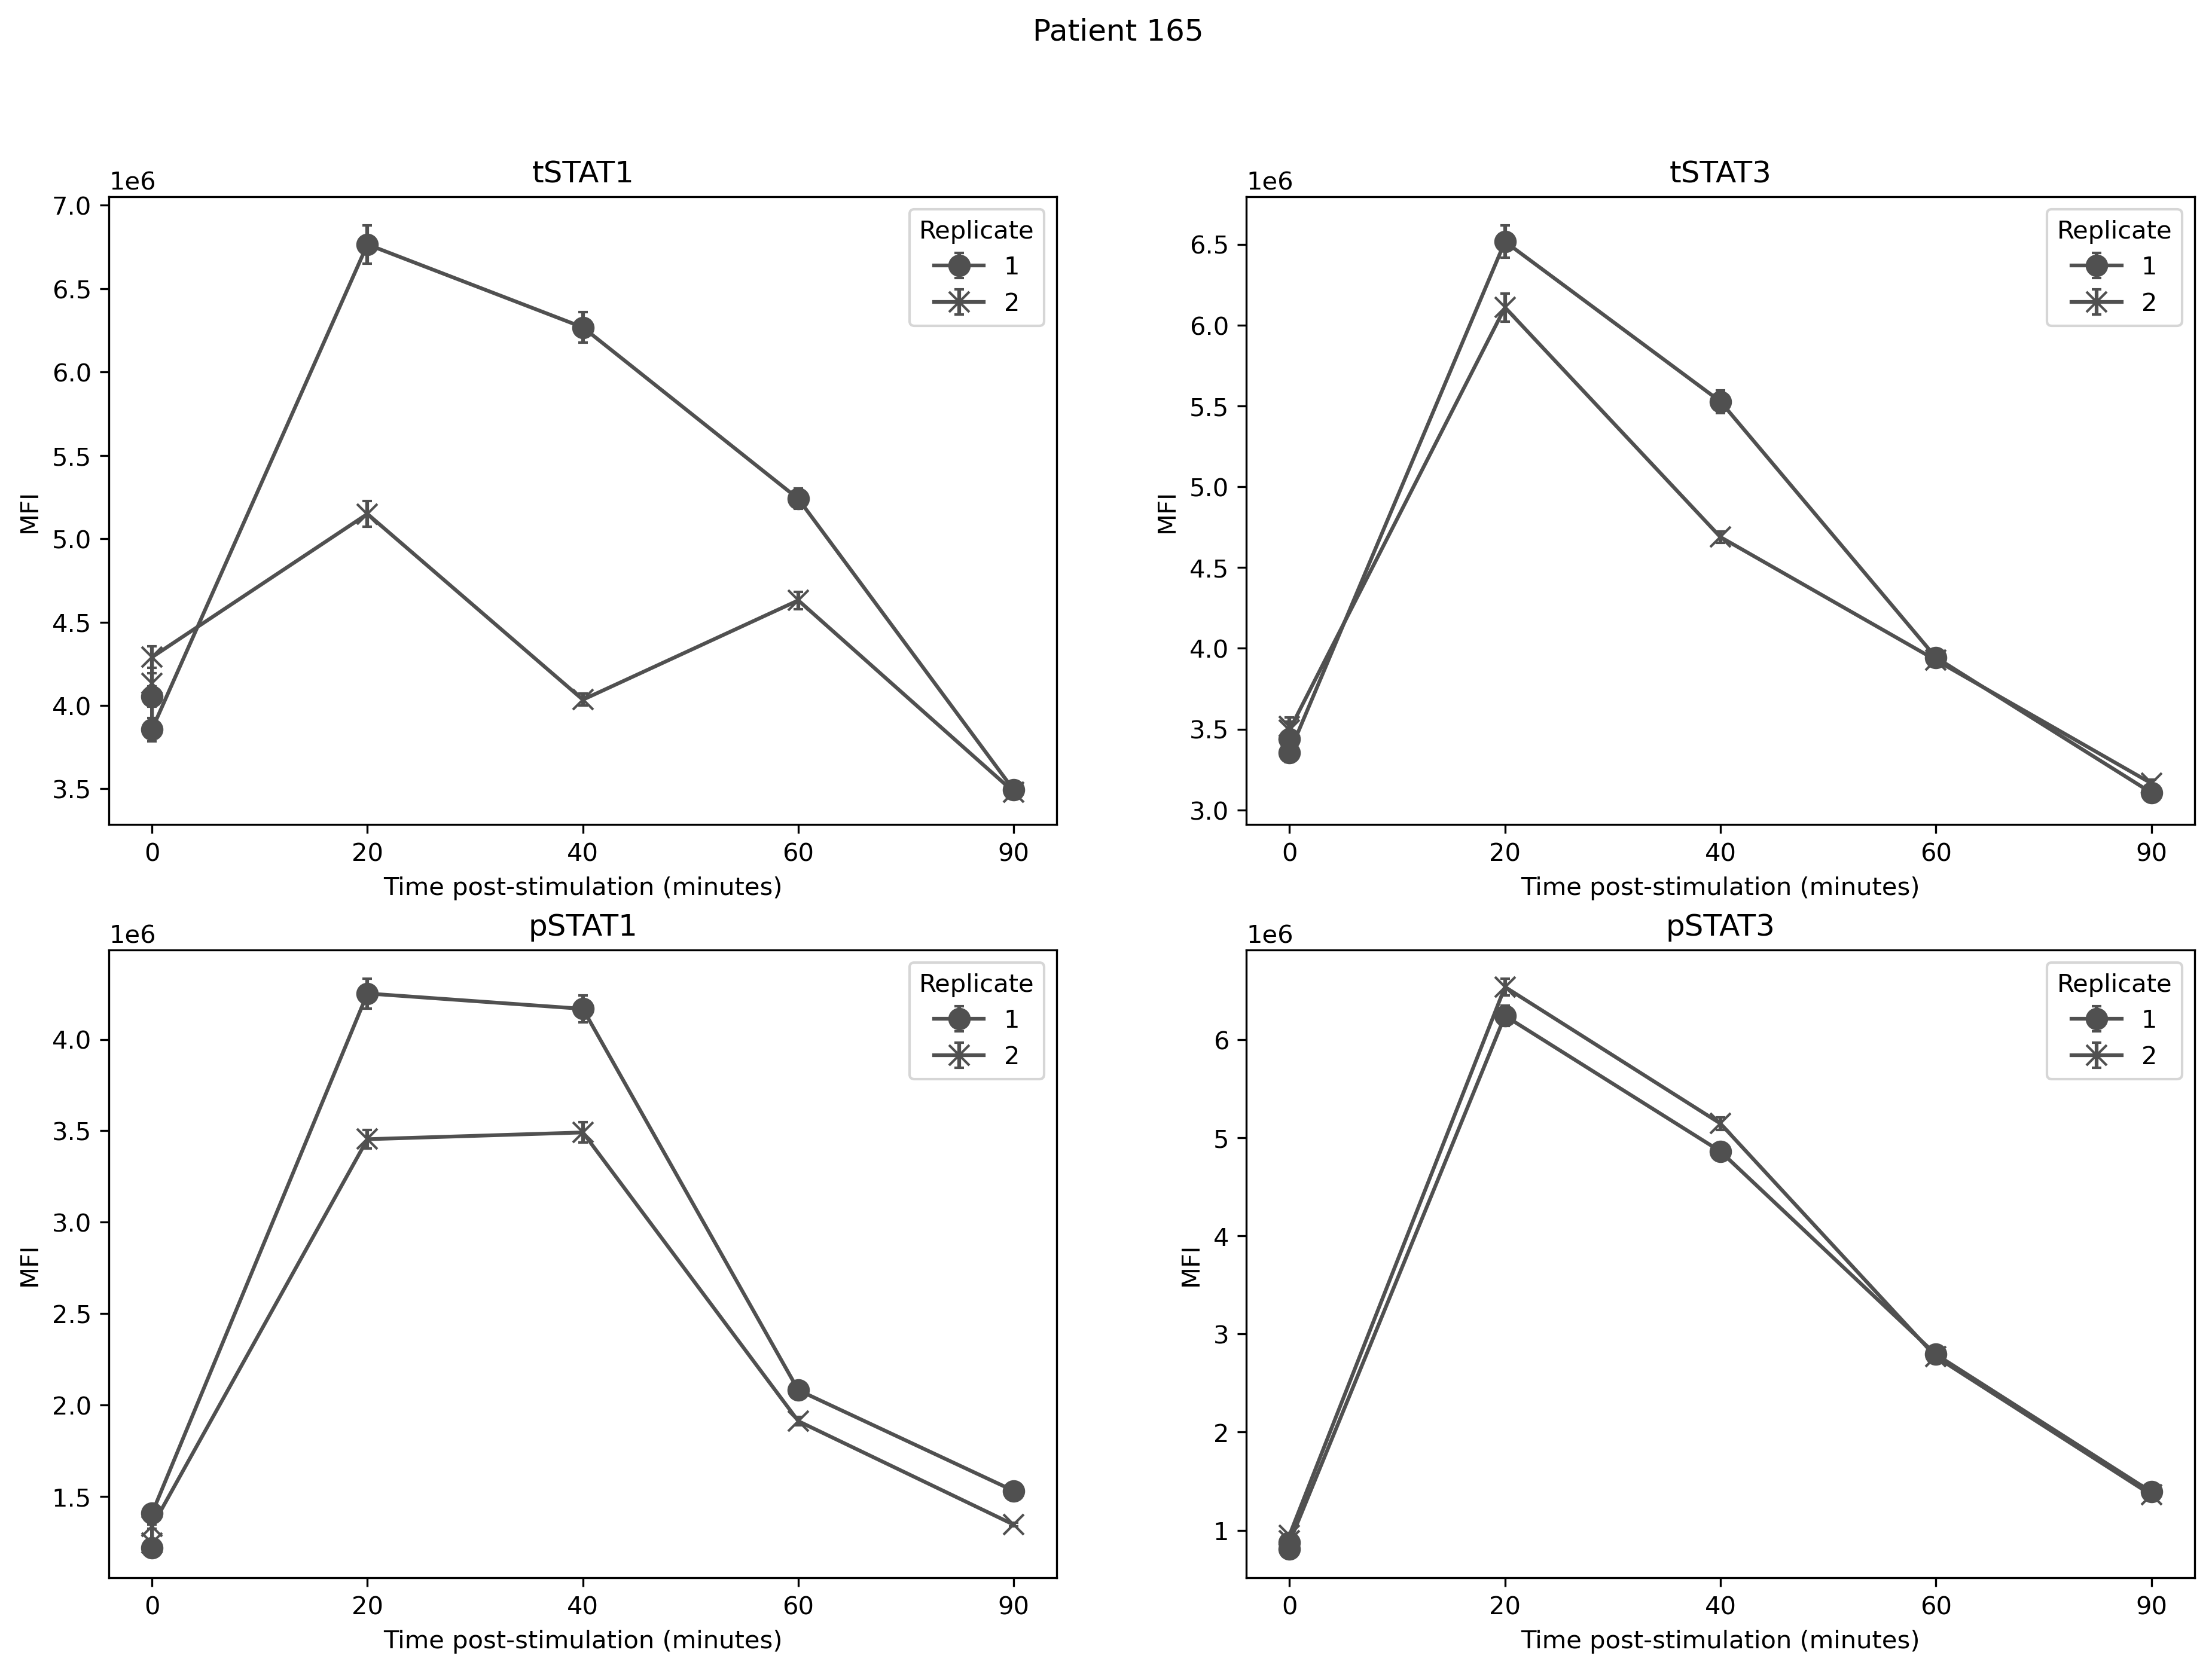

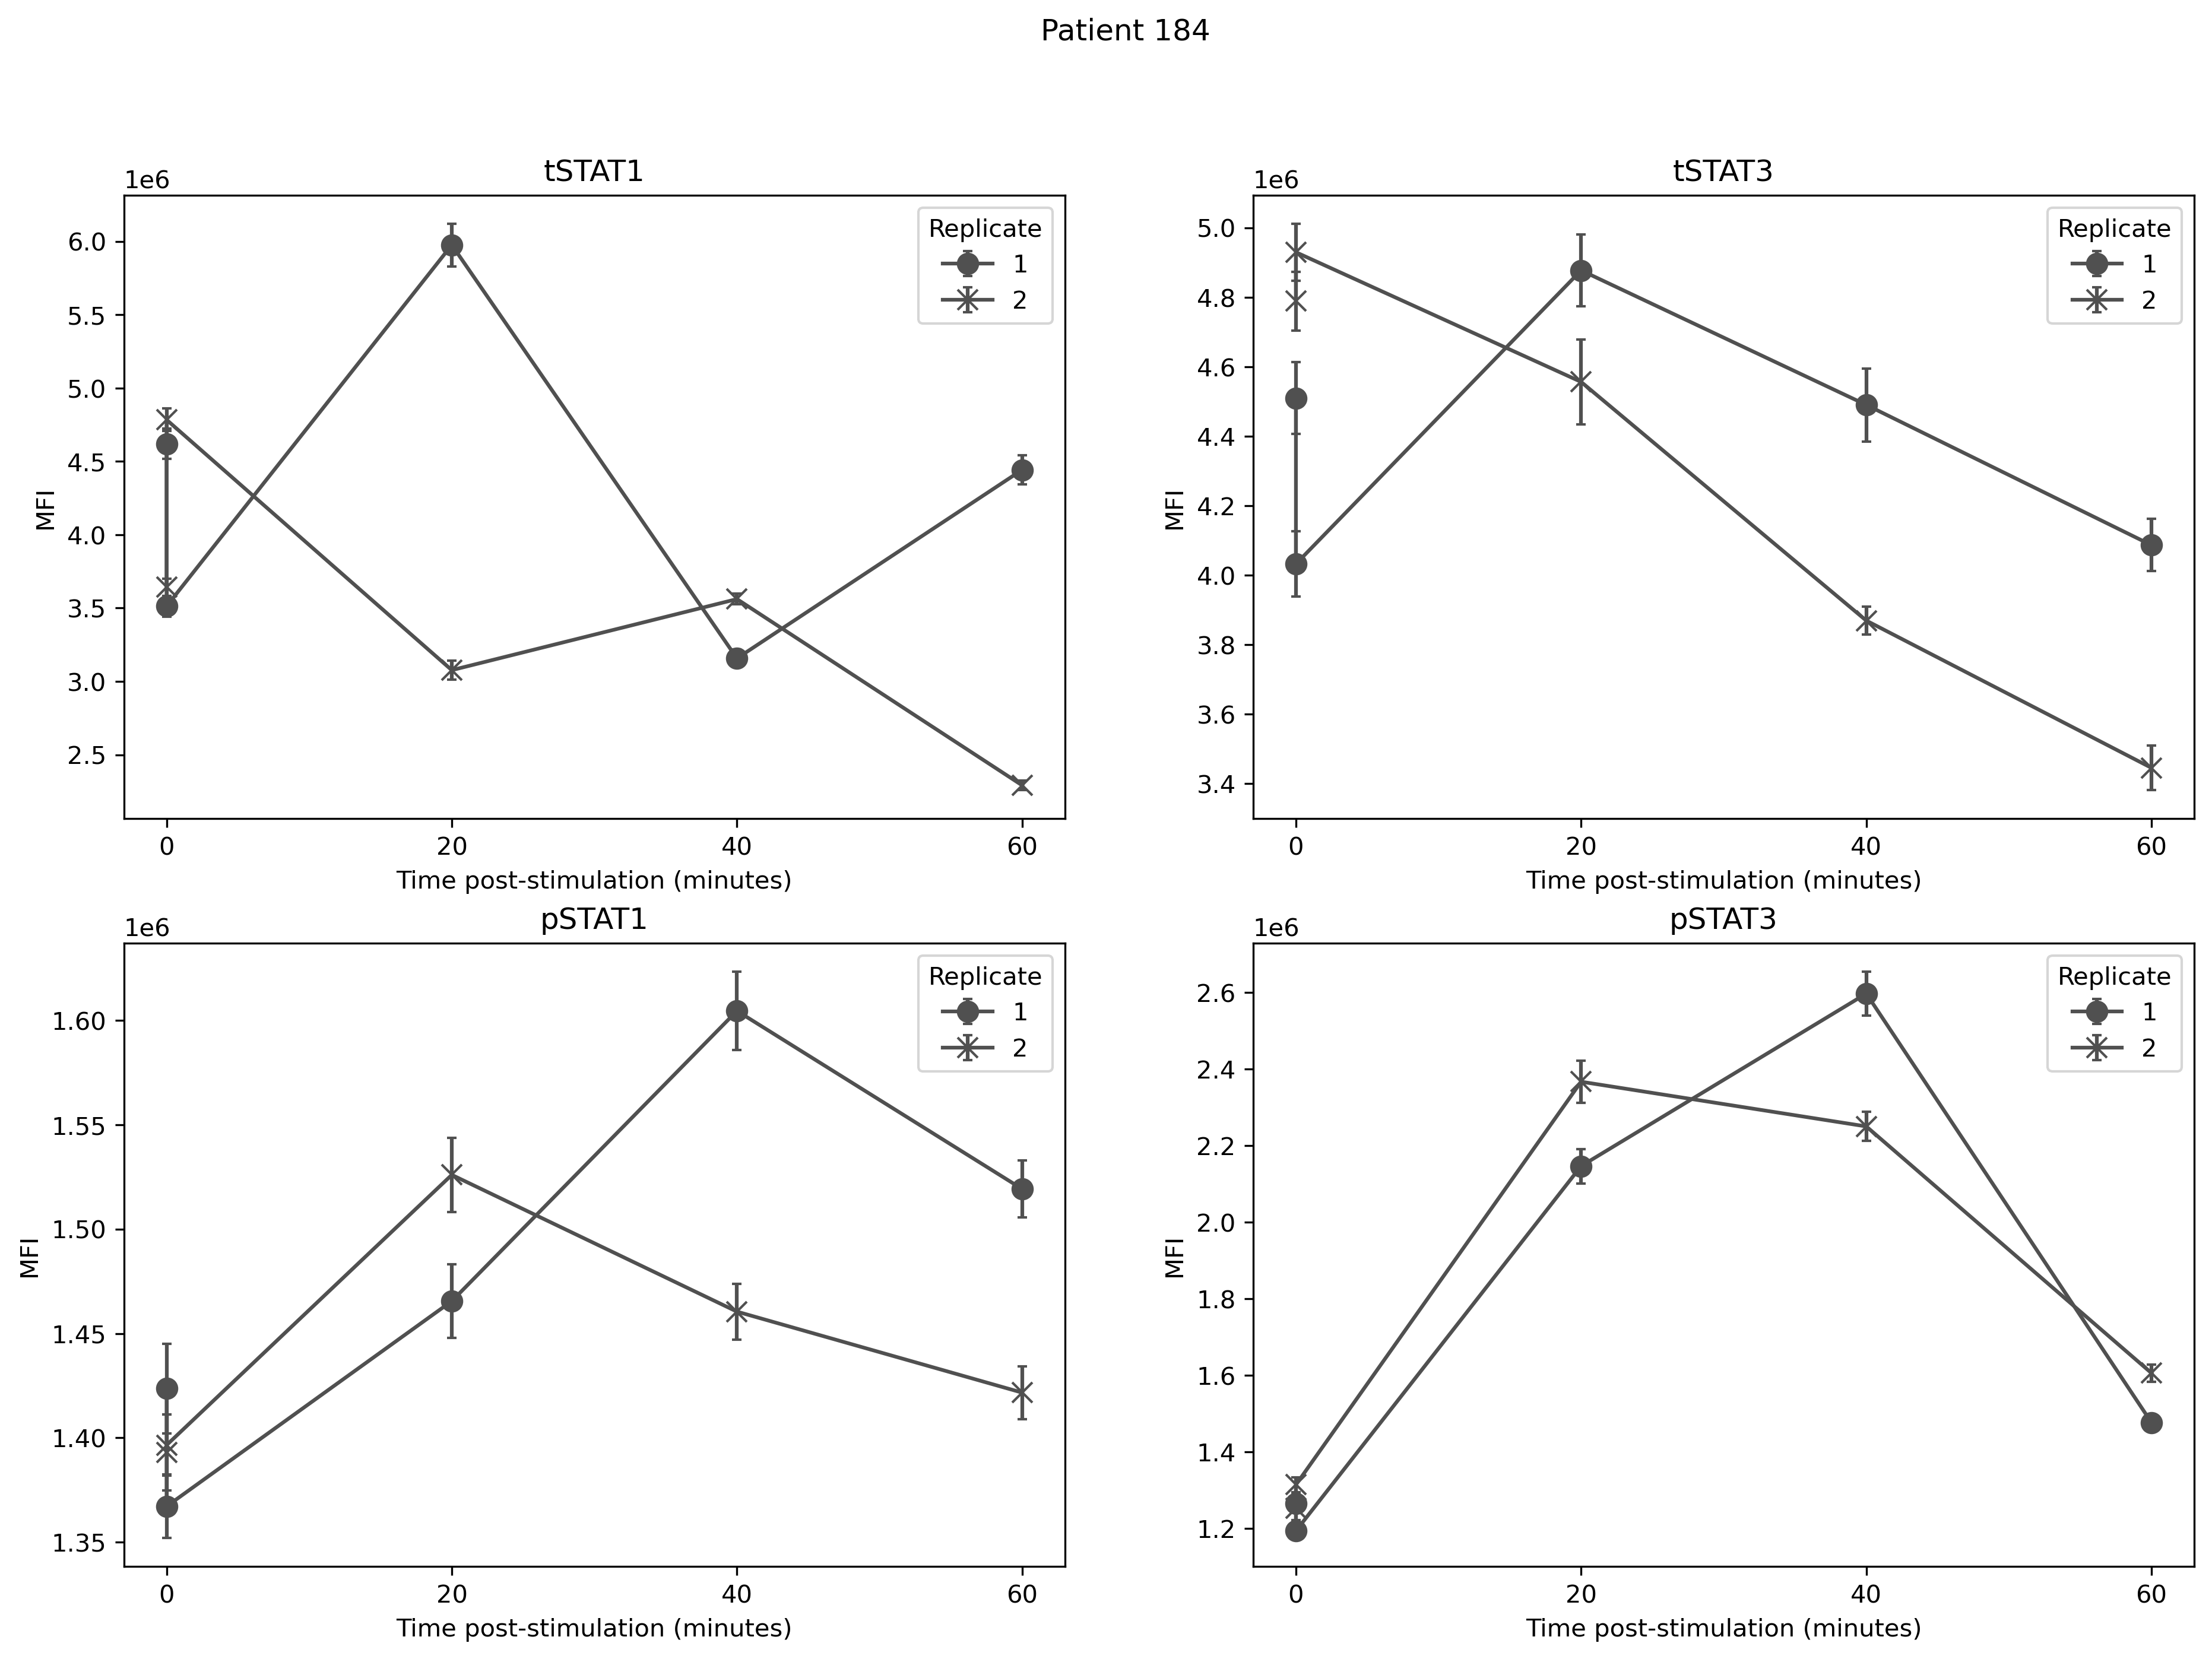

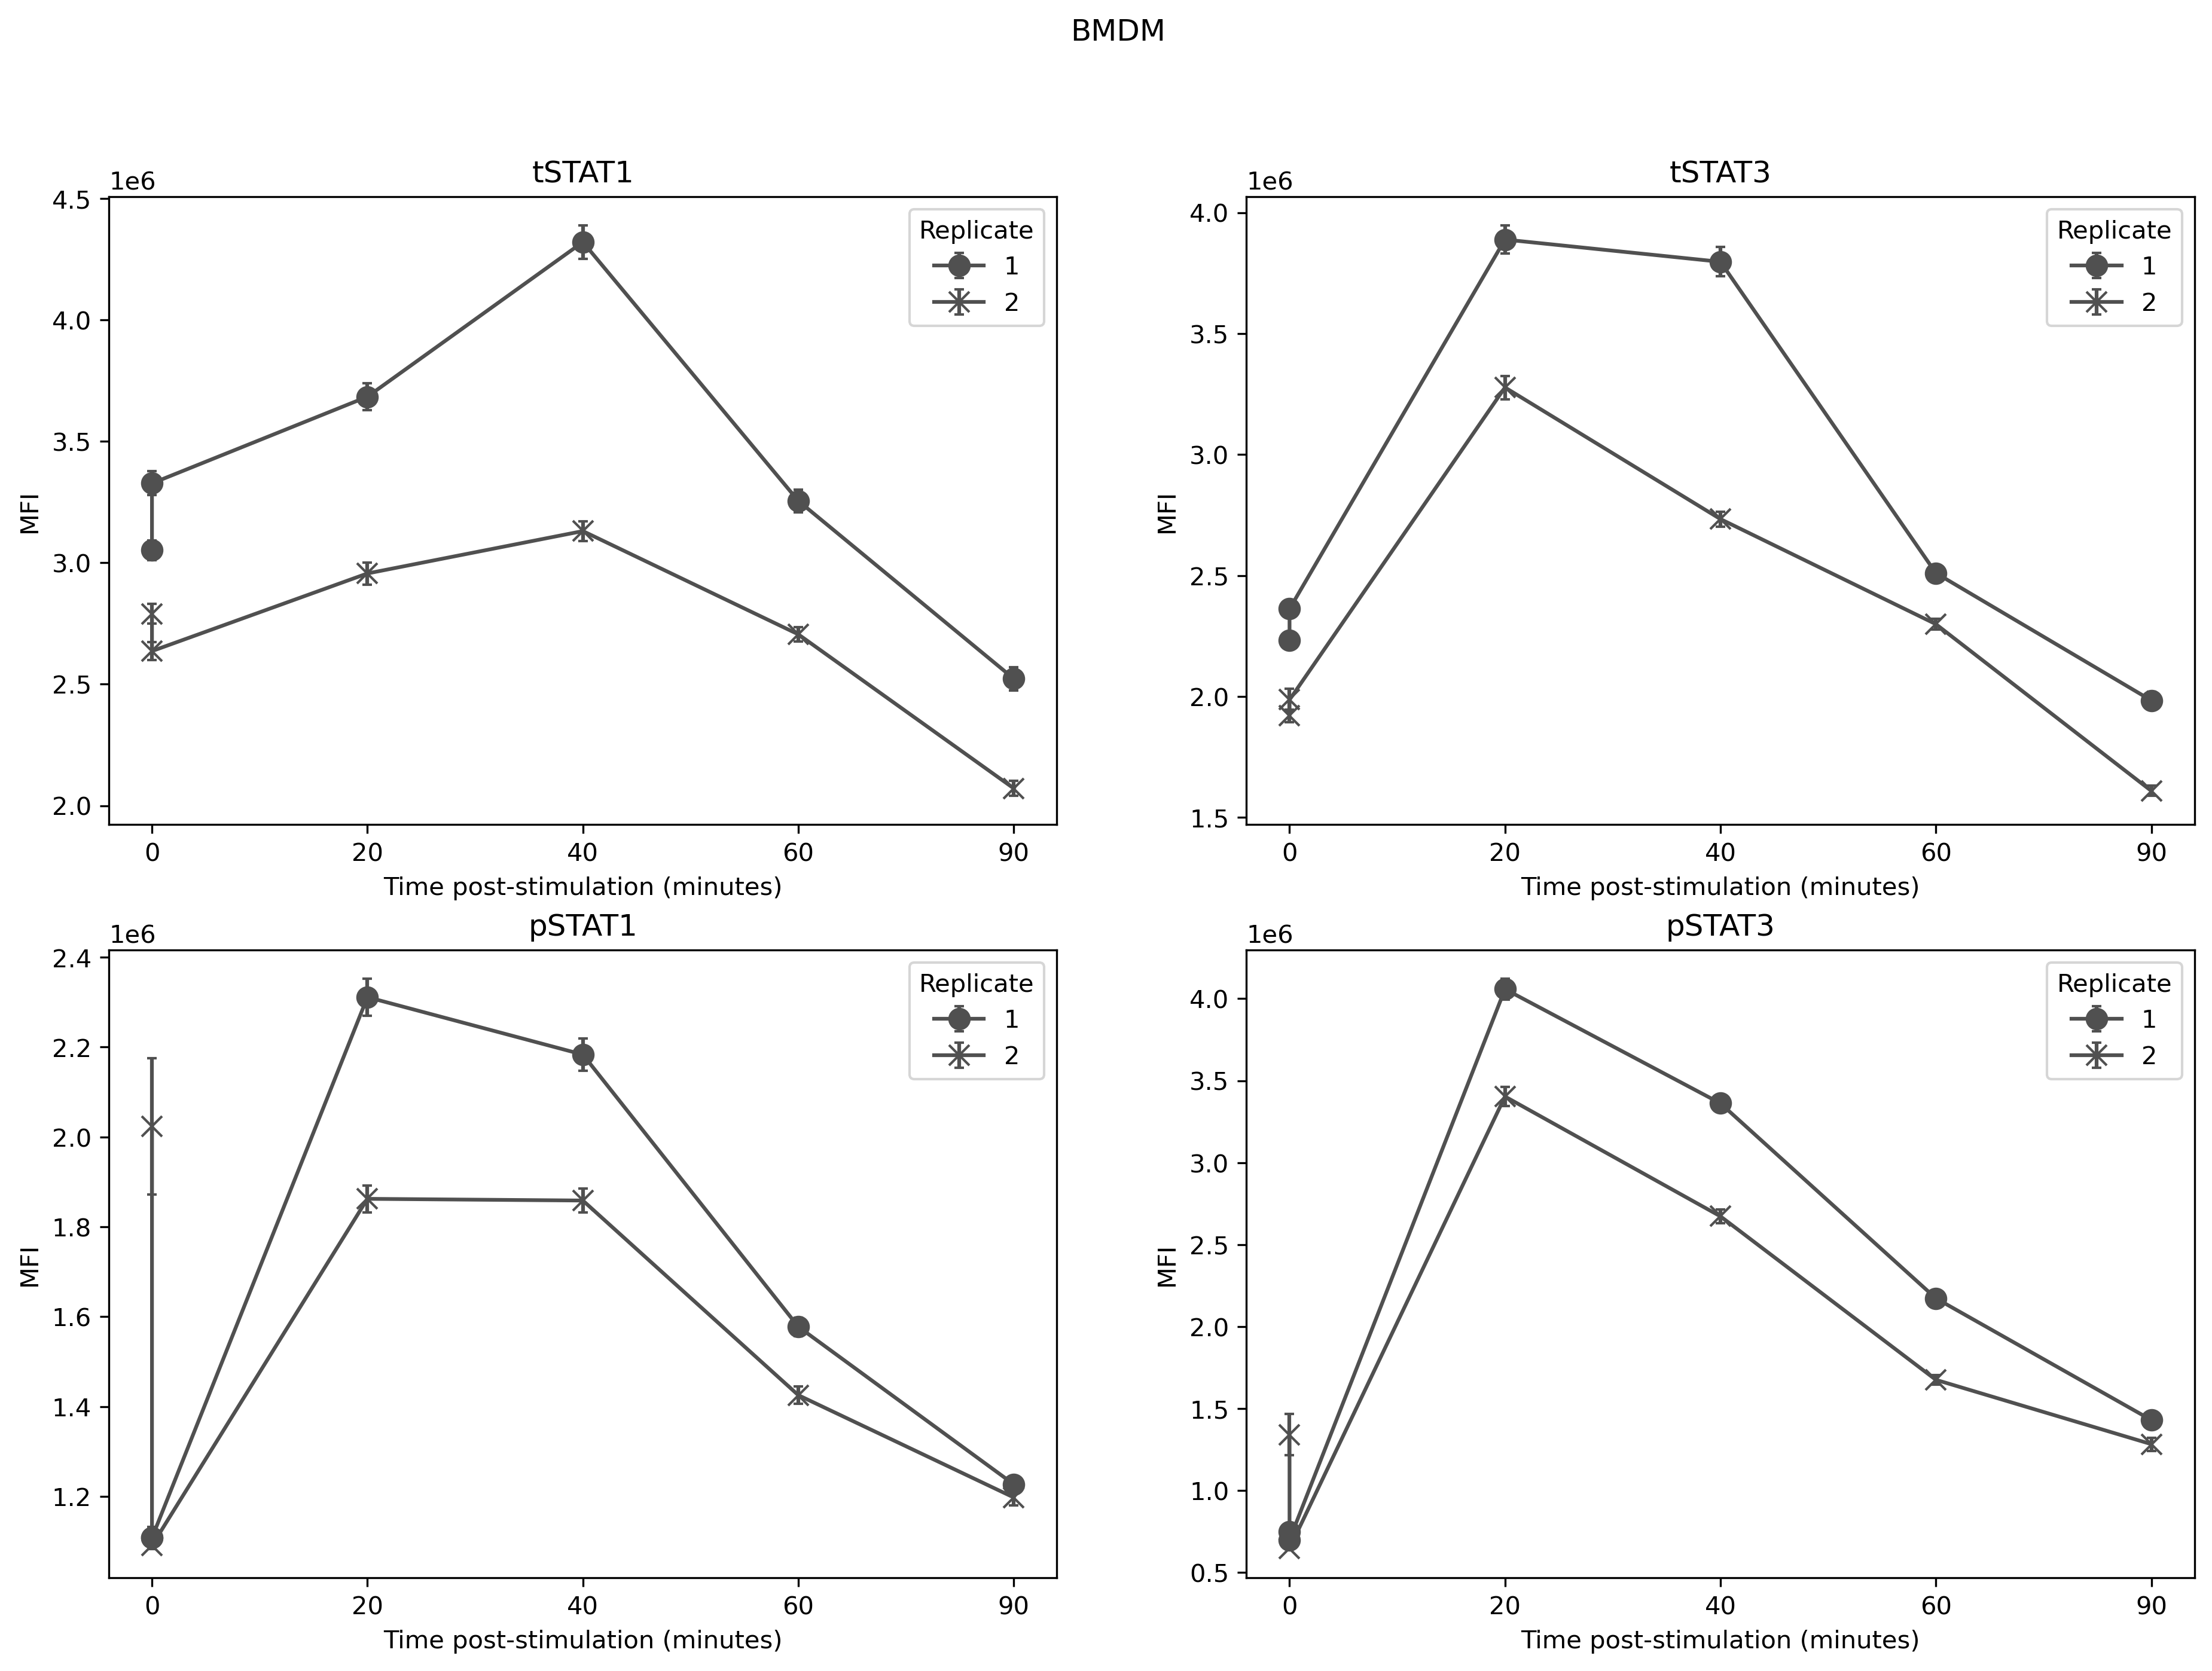

In [14]:
manual_ylim = False

og_df = dfs[0]
dose_to_ls = {
	"10 ng/mL": "-",
	"1 ng/mL": "dotted"
}

dose_to_color = {
	"1 ng/mL": "r",
	"10 ng/mL":"b"
}

il6_to_marker = {
	"1 ng/mL": "d",
	"10 ng/mL": "x"
}

replicate_to_marker = {
	1:"o",
	2:"x"
}

ylims = [[[1e6, 6*1e6], [2*1e6, 6*1e6]],
		 [[4*1e5, 6*1e5], [0.7*1e6, 2*1e6]],
		 [[4.5*1e5, 6.5*1e5], [1.2*1e6, 2.2*1e6]]]

ms = 8 # markersize
color = "#505050"
fig1, axs1 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig2, axs2 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig3, axs3 = plt.subplots(2,2, figsize=(15,10), dpi=300)

# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "tSTAT")]

for pat, cur_axs in zip(df["PatientId"].unique(), [axs1, axs2, axs3]):
	# Plot tSTATs from first scan
	stat1_ax = cur_axs[0][0]
	stat3_ax = cur_axs[0][1]
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
	stat1_ax.set_ylabel("MFI")
	stat1_ax.set_xlabel("Time post-stimulation (minutes)")
	stat1_ax.legend(title="Replicate")
	stat1_ax.set_title("tSTAT1")
	stat3_ax.set_ylabel("MFI")
	stat3_ax.set_xlabel("Time post-stimulation (minutes)")
	stat3_ax.legend(title="Replicate")
	stat3_ax.set_title("tSTAT3")
	if manual_ylim:
		stat1_ax.set_ylim(*ylims[0][0])
		stat3_ax.set_ylim(*ylims[0][1])


# Select pSTAT measurement
df = og_df[og_df["STAT"] == "pSTAT"]

for pat, cur_axs in zip(df["PatientId"].unique(), [axs1, axs2, axs3]):
	# Plot tSTATs from first scan
	stat1_ax = cur_axs[1][0]
	stat3_ax = cur_axs[1][1]
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"] == rep)]
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
	stat1_ax.set_ylabel("MFI")
	stat1_ax.set_xlabel("Time post-stimulation (minutes)")
	stat1_ax.legend(title="Replicate")
	stat1_ax.set_title("pSTAT1")
	stat3_ax.set_ylabel("MFI")
	stat3_ax.set_xlabel("Time post-stimulation (minutes)")
	stat3_ax.legend(title="Replicate")
	stat3_ax.set_title("pSTAT3")
	if manual_ylim:
		stat1_ax.set_ylim(*ylims[1][0])
		stat3_ax.set_ylim(*ylims[1][1])

id1 = df["PatientId"].unique()[0]
id2 = df["PatientId"].unique()[1]
id3 = df["PatientId"].unique()[2]

fig1.suptitle(f"Patient {id1}")
fig2.suptitle(f"Patient {id2}");
fig3.suptitle(f"BMDM")
